# 8-6. 프로젝트: 고양이 수염 스티커 만들기


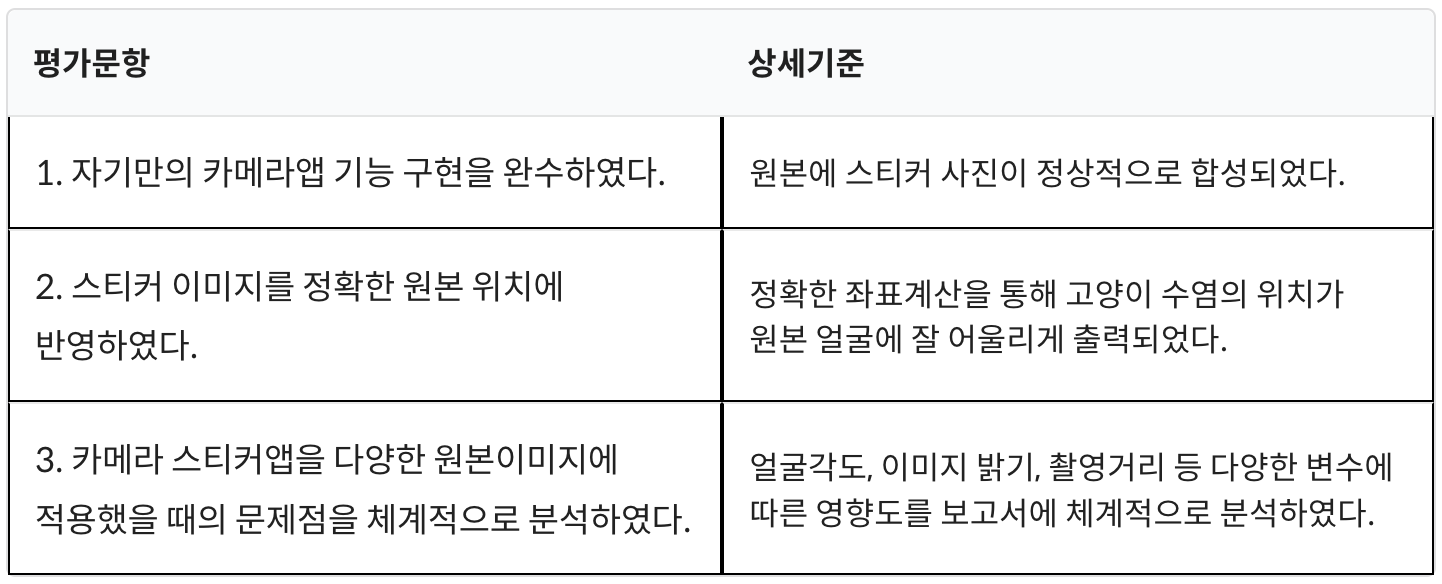

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

## Step 1. 스티커 구하기 or 만들기 


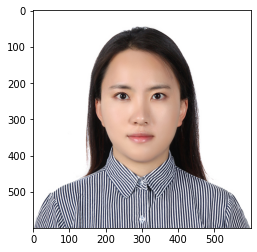

In [ ]:
my_image_folder = '/content/drive/MyDrive/0.AIFFEL/LMS node/Exp 08'
test_img = cv2.imread(my_image_folder+'/YKim.jpg')
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)  # OpenCV로 이미지를 불러옵니다
test_img_show = test_img.copy()
plt.imshow(test_img_rgb)
plt.show()

## Step 2. 얼굴 검출 & 랜드마크 검출 하기 

오늘 배운 dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾아주세요.

In [ ]:
detector_hog = dlib.get_frontal_face_detector()

In [ ]:
dlib_rects = detector_hog(test_img_rgb, 1)

rectangles[[(191, 167) (414, 390)]]


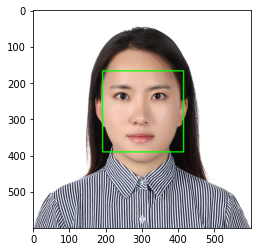

In [ ]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(test_img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

test_img_show_rgb =  cv2.cvtColor(test_img_show, cv2.COLOR_BGR2RGB)
plt.imshow(test_img_show_rgb)
plt.show()

In [ ]:
model_path = '/content/drive/MyDrive/0.AIFFEL/LMS node/Exp 08/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [ ]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(test_img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


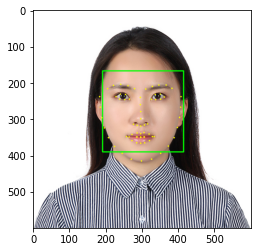

In [ ]:
# 랜드마크를 영상에 출력

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(test_img_show, point, 2, (0, 255, 255), -1)

test_img_show_rgb = cv2.cvtColor(test_img_show, cv2.COLOR_BGR2RGB)
plt.imshow(test_img_show_rgb)
plt.show()

## Step 3. 스티커 적용 위치 확인하기

고양이 수염이 적용 될 위치를 landmark를 사용해서 계산해 주세요.

In [ ]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0]
    y = landmark[30][1] 
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(296, 299)
(x,y) : (296,299)
(w,h) : (224,224)


## Step 4. 스티커 적용하기

(1) 오늘 배운 np.where 를 사용해서 스티커를 적용해 주세요.

(2) 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요? 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다. opencv 의 cv2.addWeighted() 를 참고하세요.

In [ ]:
sticker_path = '/content/drive/MyDrive/0.AIFFEL/LMS node/Exp 08/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(224, 224, 3)


In [ ]:
refined_x = x - (w//2) 
refined_y = y - (h//2)
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (184,187)


In [ ]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (184,187)


In [ ]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = test_img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
test_img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

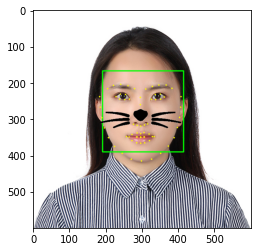

In [ ]:
plt.imshow(cv2.cvtColor(test_img_show, cv2.COLOR_BGR2RGB))
plt.show()

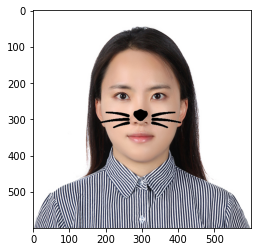

In [ ]:
sticker_area = test_img[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
test_img[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
plt.show()

## Step 5. 문제점 찾아보기

(1) 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해 보세요.

(2) 문제점이 무엇인지 최대한 자세하게 기록해 보세요. 여러분이 생각한 문제점을 해결하기 위한 방법은 분명 존재합니다!

오늘 만든 스티커앱에서 생각해볼 수 있는 문제점은 다음과 같습니다.

얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
실행 속도가 중요할까요?
스티커앱을 만들 때 정확도가 얼마나 중요할까요?

1. 사진 안에 인물이 여러 명일 경우, 필터를 모두 씌우기

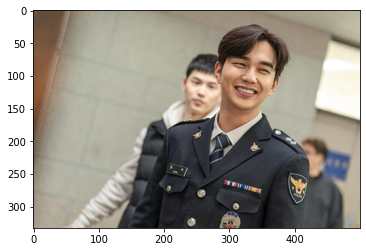

In [ ]:
tilt_img = cv2.imread(my_image_folder+'/tilt.jpeg')
tilt_img = cv2.cvtColor(tilt_img, cv2.COLOR_BGR2RGB)  # OpenCV로 이미지를 불러옵니다
tilt_img_show = tilt_img.copy()
plt.imshow(tilt_img)
plt.show()

In [ ]:
dlib_rects = detector_hog(tilt_img, 1)

rectangles[[(285, 56) (374, 146)], [(225, 94) (287, 156)]]


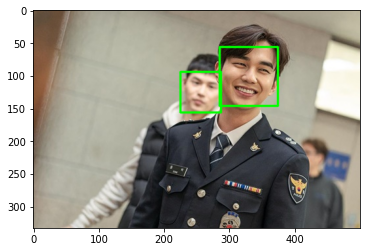

In [ ]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(tilt_img, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

plt.imshow(tilt_img)
plt.show()

In [ ]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(tilt_img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


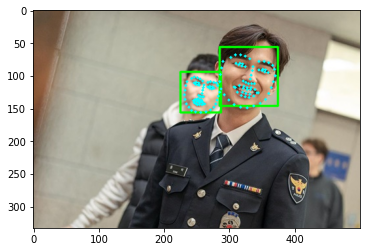

In [ ]:
# 랜드마크를 영상에 출력

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(tilt_img, point, 2, (0, 255, 255), -1)

plt.imshow(tilt_img)
plt.show()

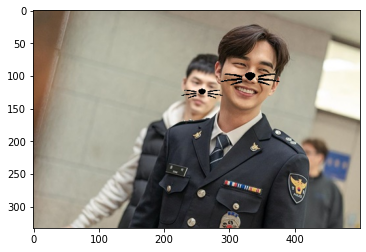

In [ ]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0]
    y = landmark[30][1] 
    w = h = dlib_rect.width()
    sticker_path = '/content/drive/MyDrive/0.AIFFEL/LMS node/Exp 08/cat-whiskers.png'
    img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
    img_sticker = cv2.resize(img_sticker, (w,h))
    refined_x = x - (w//2) 
    refined_y = y - (h//2)
    if refined_x < 0: 
      img_sticker = img_sticker[:, -refined_x:]
      refined_x = 0
    if refined_y < 0:
      img_sticker = img_sticker[-refined_y:, :]
      refined_y = 0
    sticker_area = tilt_img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    tilt_img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(tilt_img_show)
plt.show()



2. 얼굴의 각도가 다를 경우 스티커 회전하기

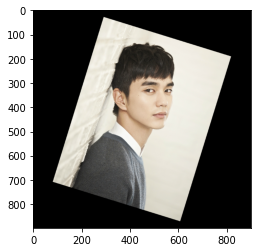

In [ ]:
# 1. 각도가 틀어진 이미지 불러오기
tilt_img1 = cv2.imread(my_image_folder+'/tilt1.jpeg')
tilt_img1 = cv2.cvtColor(tilt_img1, cv2.COLOR_BGR2RGB)  # OpenCV로 이미지를 불러옵니다
tmp_rotate = tilt_img1.copy() # 회전할 각도 확인용 이미지 복사
# 2. 틀어진 각도 계산하기
dlib_rects = detector_hog(tmp_rotate)

list_landmarks = []

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    points = landmark_predictor(tilt_img1, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

# landmark 에서 얼굴 양쪽 점의 기울기를 구함
for landmark in list_landmarks:
  a = (landmark[1][1]-landmark[15][1])/(landmark[1][0]-landmark[15][0])

# 3. 원본 이미지의 각도를 회전시킴
num_rows, num_cols = tilt_img1.shape[:2]
# NEW - Determine the diagonal length of the image
diagonal = int(np.ceil(np.sqrt(num_rows**2.0 + num_cols**2.0)))
# NEW - Determine how many pixels we need to pad to the top/bottom and left/right
pp_r, pp_c = (diagonal - num_rows) // 2, (diagonal - num_cols) // 2
# NEW - Pad the image
tmp_rotate_copy = np.pad(tmp_rotate, ((pp_r, pp_r), (pp_c, pp_c),(0,0)), 'constant', constant_values=(0,0))
### Your code as before - note we are rotating the zero padded image
num_rows, num_cols = tmp_rotate_copy.shape[:2]
M = cv2.getRotationMatrix2D((num_cols/2,num_rows/2),math.degrees(math.atan(a)),1)
dst = cv2.warpAffine(src=tmp_rotate_copy,M=M,dsize=tmp_rotate_copy.shape[:2],flags=cv2.INTER_NEAREST)
plt.imshow(dst)
## 출처: https://stackoverflow.com/questions/49516630/opencv-python3-cannot-rotate-image-back-correctly
tilt_img_show = dst.copy() # show 용으로 복사해둠

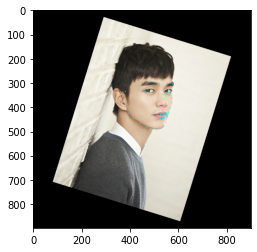

In [ ]:
# 4. 회전한 각도에서 다시 안면 인식을 진행함
dlib_rects = detector_hog(dst)

list_landmarks = []

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    points = landmark_predictor(dst, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(dst, point, 2, (0, 255, 255), -1)

plt.imshow(dst)
plt.show()

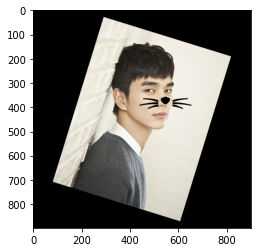

In [ ]:
# 5. 스티커를 붙임
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0]
    y = landmark[30][1] 
    w = h = dlib_rect.width()
    sticker_path = '/content/drive/MyDrive/0.AIFFEL/LMS node/Exp 08/cat-whiskers.png'
    img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
    img_sticker = cv2.resize(img_sticker, (w,h))
    refined_x = x - (w//2) 
    refined_y = y - (h//2)
    if refined_x < 0: 
      img_sticker = img_sticker[:, -refined_x:]
      refined_x = 0
    if refined_y < 0:
      img_sticker = img_sticker[-refined_y:, :]
      refined_y = 0
    sticker_area = tilt_img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    tilt_img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(tilt_img_show)
plt.show()


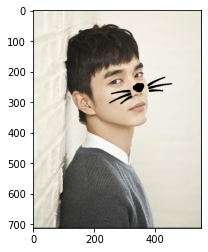

In [ ]:
# 6. 원래대로 돌림
OKMM = cv2.invertAffineTransform(M)
tilt_img_show = cv2.warpAffine(tilt_img_show,OKMM,(cols,rows),flags = cv2.INTER_NEAREST)

# NEW - Crop the image
tilt_img_show = tilt_img_show[pp_r:-pp_r+1,pp_c:-pp_c+1]
plt.imshow(tilt_img_show)

3. 여러명일 경우 각도 회전해서 스티커 붙이기

In [ ]:
def detect_landmark(img):
  dlib_rects = detector_hog(img)

  list_landmarks = []
  for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    points = landmark_predictor(img, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
  return zip(dlib_rects, list_landmarks)

def show_landmark(img, detect_landmark):
  for dlib_rect, landmark in detect_landmark:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    cv2.rectangle(img, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    for point in landmark:
      cv2.circle(img, point, 2, (0, 255, 255), -1)
  plt.imshow(img)
  plt.show()

In [ ]:
def detect_landmark1(img):
  dlib_rects = detector_hog(img)

  list_landmarks = []
  for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    points = landmark_predictor(img, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
  return list_landmarks


In [ ]:
def detect_landmark2(img):
  dlib_rects = detector_hog(img)

  list_landmarks = []
  for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    points = landmark_predictor(img, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
  return dlib_rects


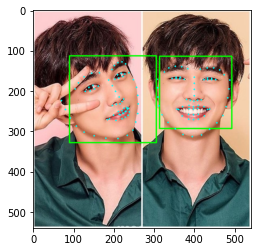

In [ ]:
show_landmark(tilt_img, detect_landmark(tilt_img))

In [ ]:
def cal_angle(landmark):
  a = (landmark[1][1]-landmark[15][1])/(landmark[1][0]-landmark[15][0])
  return a

In [ ]:
def crop(image):
    y_nonzero, x_nonzero, _ = np.nonzero(image)
    return image[np.min(y_nonzero):np.max(y_nonzero), np.min(x_nonzero):np.max(x_nonzero)]

In [ ]:
def rotate_imgs(img, detect_landmark):
  i=0
  sticker_path = '/content/drive/MyDrive/0.AIFFEL/LMS node/Exp 08/cat-whiskers.png'
  img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
  num_rows, num_cols = img.shape[:2]
  diagonal = int(np.ceil(np.sqrt(num_rows**2.0 + num_cols**2.0)))
  pp_r, pp_c = (diagonal - num_rows) // 2, (diagonal - num_cols) // 2
  tmp_rotate_copy = np.pad(img, ((pp_r, pp_r), (pp_c, pp_c),(0,0)), 'constant', constant_values=(0,0))
  num_rows, num_cols = tmp_rotate_copy.shape[:2]
  for dlib_rect, landmark in detect_landmark:    
    angle = cal_angle(landmark)
    M = cv2.getRotationMatrix2D((num_cols/2,num_rows/2),math.degrees(math.atan(angle)),1)
    dst = cv2.warpAffine(src=tmp_rotate_copy,M=M,dsize=tmp_rotate_copy.shape[:2],flags=cv2.INTER_NEAREST)
    tmp_landmark = detect_landmark1(dst)
    tmp_dlib = detect_landmark2(dst)
    x = tmp_landmark[0][30][0]
    y = tmp_landmark[0][30][1] 
    w = h = tmp_dlib[0].width()
    img_sticker = cv2.resize(img_sticker, (w,h))
    refined_x = x - (w//2) 
    refined_y = y - (h//2)
    sticker_area = dst[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    dst[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
    i += 1
    OKMM = cv2.invertAffineTransform(M)
    dst = cv2.warpAffine(dst,OKMM,(cols,rows),flags = cv2.INTER_NEAREST)
    dst = dst[pp_r:-pp_r+1,pp_c:-pp_c+1]
    # plt.imshow(crop(dst))
    # plt.show()
    dst = crop(dst)
  return dst

    

In [ ]:
tilt_img = cv2.imread(my_image_folder+'/tilt2.jpeg')
tilt_img = cv2.cvtColor(tilt_img, cv2.COLOR_BGR2RGB)  # OpenCV로 이미지를 불러옵니다

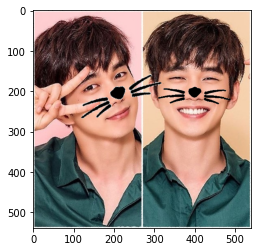

In [ ]:
test = rotate_imgs(tilt_img, detect_landmark(tilt_img))
test1 = rotate_imgs(plt.imshow(test1)
plt.show()test, detect_landmark(test))


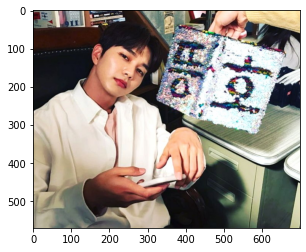

In [ ]:
tilt_img3 = cv2.imread(my_image_folder+'/tilt3.jpeg')
tilt_img3 = cv2.cvtColor(tilt_img3, cv2.COLOR_BGR2RGB) 
plt.imshow(tilt_img3)
plt.show()

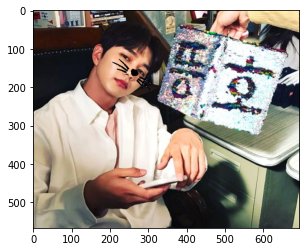

In [ ]:
plt.imshow(rotate_imgs(tilt_img3,detect_landmark(tilt_img3)))
plt.show()

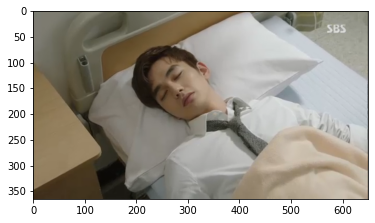

In [ ]:
tilt_img4 = cv2.imread(my_image_folder+'/tilt4.png')
cv2.imwrite(my_image_folder+'/tilt4.jpg', tilt_img4, [int(cv2.IMWRITE_JPEG_QUALITY), 100])
tilt_img5 = cv2.imread(my_image_folder+'/tilt4.jpg')
tilt_img5 = cv2.cvtColor(tilt_img4, cv2.COLOR_BGR2RGB) 
plt.imshow(tilt_img5)
plt.show()

In [ ]:
plt.imshow(rotate_imgs(tilt_img5,detect_landmark(tilt_img5)))
plt.show()

UnboundLocalError: ignored

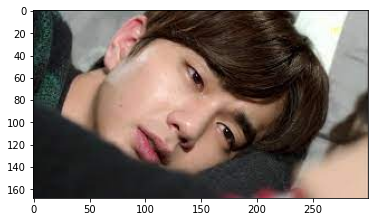

In [ ]:
show_landmark(tilt_img5, detect_landmark(tilt_img5))

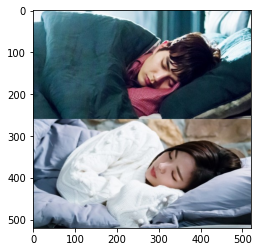

In [ ]:
tilt_img4 = cv2.imread(my_image_folder+'/tilt6.jpeg')
tilt_img4 = cv2.cvtColor(tilt_img4, cv2.COLOR_BGR2RGB) 
plt.imshow(tilt_img4)
plt.show()

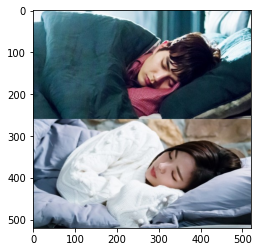

In [ ]:
show_landmark(tilt_img4, detect_landmark(tilt_img4))

## 회고

- 여러명이 있는 사진을 어쩌다가 넣게 되면서 시작되었다. 여러명을 인식하고 싶어서 for 문으로 구현했는데.. 고개의 각도가 틀어져있어서 각도를 돌리는 것을 시도했다. 하지만 이미지를 rotate를 하면 검은 배경이 생기는 문제가 생겼다. 그래서 검색하다가 이미지를 돌릴 때 pedding 을 사용하면 돌리고 다시 원상복귀 할때 없어진다는 것을 찾아서 스티커를 돌리는 것이 아니라 이미지의 얼굴을 스티커의 모양에 맞춰서 돌린 후 스티커를 붙이고 다시 이미지를 원래대로 돌리는 방식으로 구현했다. 각도가 다른 얼굴들을 넣었을 때는 시간이 조금 더 많이 걸렸다. for 문으로 얼굴 각각에 수염을 붙이는 방식으로 접근했으나 동시에 나오지 않아서 오래 걸렸다... 그러다가 함수를 여러번 넣으면 어떻게 될까해서 넣어봤더니 둘 다 수염이 붙어서 나왔다. 

- 모델 자체가 landmark_predictor에서 이미 구현된 것을 그대로 사용해서 얼굴을 인식하지 못하는 (누워있는 등) 경우에는 추후 작업이 불가능했다.

- 목표한 결과는 어찌됬든 얻기는 했지만 초급 수준의 코딩이라 비효율적인 것 같아서 더 찾아봤는데.. 역시나 많은 고민들을 깔끔하게 구현한 깃헙을 발견했다. 여러 단계로 나눠서 접근하고 구현하지 못한 것들까지 구현되어 있어서 허무함을 느끼긴 했지만, 이렇게도 할 수 있구나 공부할 수 있어서 아래에 추가해두었다.



4. 정면이 아닐 경우

출처: https://github.com/museonghwang/AIFFEL/blob/ee1bab8ebd6ca5e6119f25edd9e04d97418d874c/Exploration_03/Cat_Sticker.ipynb


In [ ]:
def sticker_transformation_test(image):
    image_show = image.copy()   # 원본 이미지 image_show 이름으로 저장
    detector_hog = dlib.get_frontal_face_detector() # Face detector, Returns the default face detector
    dlib_rects = detector_hog(image, 1)             # detect input img, para 1 means 1 times upsamle

    # detected 얼굴 시각화
    for rect in dlib_rects:
        left = rect.left()      # left x value
        top = rect.top()        # top y value
        right = rect.right()    # right x value
        bottom = rect.bottom()  # detect box bottom y value

        # add detect box in image
        cv2.rectangle(image_show, (left, top), (right, bottom), (0,255,0), 2) # 상자 그리기 Face Detection

    list_landmarks = []

    # 얼굴 영역 박스 마다 face landmark를 찾아냄.
    for dlib_rect in dlib_rects:
        points = landmark_predictor(image_show, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts())) # face landmark 좌표를 저장
        list_landmarks.append(list_points)  # total 68 landmark count
    
    # landmark 출력
    for landmark in list_landmarks:
        for point in landmark:
            cv2.circle(image_show, point, 2, (0, 128, 255), -1)
    
    # 고양이 스티커의 영역(꼭지점으로 연결)
    vertices1 = np.array([landmark[1], landmark[29], landmark[33], landmark[3]])
    vertices2 = np.array([landmark[29], landmark[15], landmark[13], landmark[33]])
    cv2.polylines(image_show, [vertices1], isClosed=True, color=(0, 128, 255))
    cv2.polylines(image_show, [vertices2], isClosed=True, color=(0, 128, 255))

    plt.imshow(cv2.cvtColor(image_show, cv2.COLOR_BGR2RGB))
    plt.show()


#출처: https://github.com/museonghwang/AIFFEL/blob/ee1bab8ebd6ca5e6119f25edd9e04d97418d874c/Exploration_03/Cat_Sticker.ipynb

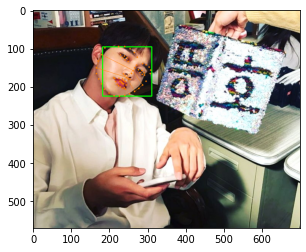

In [ ]:
tilt_img3 = cv2.imread(my_image_folder+'/tilt3.jpeg')
sticker_transformation_test(tilt_img3)


In [ ]:
# sticker image points transform
def points_box(points):
    x_zero = np.min([x for x, _y in points])
    y_zero = np.min([y for _x, y in points])
    points_new = []
    for pnt in points:
        points_new.append([pnt[0] - x_zero, pnt[1] - y_zero])
    return points_new

# sticker image transform
def transform_image_sticker(image_sticker, landmark):
    sticker_gray = cv2.cvtColor(image_sticker, cv2.COLOR_BGR2GRAY)  # sticker를 GRAY Scale로 변환
    img_rev = cv2.bitwise_not(sticker_gray)     # sticker에 bitwise_not연산(ex. 0->1, 1->0)
    coords = cv2.findNonZero(img_rev)
    x_dummy, y, w_dummy, h = cv2.boundingRect(coords)
    
    image_sticker = image_sticker[y : y + h, :, :]  # sticker 영역 수정

    sticker_half = image_sticker.shape[1] // 2      # sticker의 절반
    sticker_left = image_sticker[:, :sticker_half]  # sticker 절반 기준 왼쪽
    sticker_right = image_sticker[:, sticker_half:] # sticker 절반 기준 오른쪽

    h, w = image_sticker.shape[0], image_sticker.shape[1] # 변환된 스티거의 높이, 너비

    # 얼굴형태에 맞게 변환
    points = [[0, 0], [0, h], [w // 2, 0], [w // 2, h]]
    v1_src = np.float32(points)
    v2_src = np.float32(points)
    v1 = np.array([landmark[1], landmark[3], landmark[29], landmark[33]])   # 얼굴기준 왼쪽 landmark
    v2 = np.array([landmark[29], landmark[33], landmark[15], landmark[13]]) # 얼굴기준 오른쪽 landmark
    v1_dst = np.float32(points_box(v1))
    v2_dst = np.float32(points_box(v2))

    # cv2.getPerspectiveTransform()
    # cv2.warpPerspective() 함수에 변환행렬값을 적용하여 최종 결과 이미지를 얻을 수 있음
    m1 = cv2.getPerspectiveTransform(v1_src, v1_dst)
    m2 = cv2.getPerspectiveTransform(v2_src, v2_dst)

    x1, y1, w1, h1 = cv2.boundingRect(v1)
    x2, y2, w2, h2 = cv2.boundingRect(v2)
    sticker_left_warp = cv2.warpPerspective(sticker_left, m1, (w1, h1), borderValue=(255, 255, 255))
    sticker_right_warp = cv2.warpPerspective(sticker_right, m2, (w2, h2), borderValue=(255, 255, 255))

    return (x1, y1, sticker_left_warp), (x2, y2, sticker_right_warp)

# 이미지가 벗어난다면...
def refined_image(image, x, y, w, h):
    refined_x = x - w // 2
    refined_y = y - h
    if refined_x < 0:
        image = image[:, -refined_x:]
    if refined_y < 0:
        image = image[-refined_y:, :]
    return image

# sticker attach
def sticker(image, image_sticker):
    image_show = image.copy()   # 원본 이미지 image_show 이름으로 저장
    detector_hog = dlib.get_frontal_face_detector() # Face detector, Returns the default face detector
    dlib_rects = detector_hog(image, 1)             # detect input img, para 1 means 1 times upsamle

    list_landmarks = []

    # 얼굴 영역 박스 마다 face landmark를 찾아냄.
    for dlib_rect in dlib_rects:
        points = landmark_predictor(image_show, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts())) # face landmark 좌표를 저장
        list_landmarks.append(list_points)  # total 68 landmark count

    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        w = dlib_rect.width()
        h = dlib_rect.height()
        x = landmark[30][0] # landmark의 30은 코의 위치
        y = landmark[30][1] + h // 2

        image_sticker = cv2.resize(image_sticker, (w, h))         # sticker 영역 box 크기만큼 resize
        image_sticker = refined_image(image_sticker, x, y, w, h)  # 만약 이미지가 벗어나면 재정의
        p1, p2 = transform_image_sticker(image_sticker, landmark) # sticker 변경

        for x, y, sticker in [p1, p2]:
            sticker_area = image_show[y : y + sticker.shape[0], x : x + sticker.shape[1]]
            image_show[y : y + sticker.shape[0], x : x + sticker.shape[1]] = np.where(sticker >= 128, sticker_area, sticker)

    return image_show

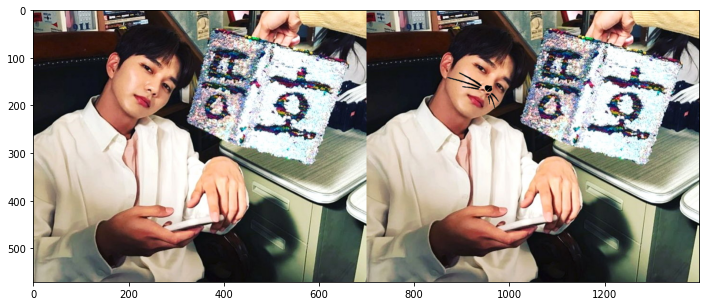

In [ ]:
image_transform = sticker(tilt_img3, img_sticker)
result = cv2.hconcat([tilt_img3, image_transform])
plt.figure(figsize=(20,5))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

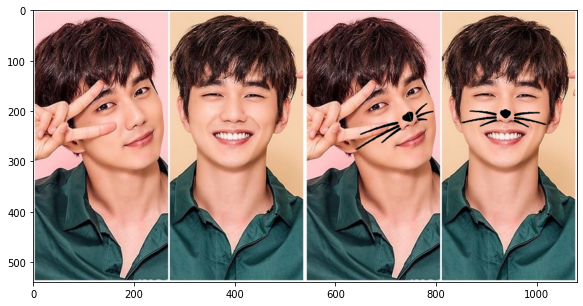

In [ ]:
tilt_img = cv2.imread(my_image_folder+'/tilt2.jpeg')
image_transform = sticker(tilt_img, img_sticker)
result = cv2.hconcat([tilt_img, image_transform])
plt.figure(figsize=(20,5))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()